## A/B Test o Test de dos muestras - Variables numericas
En esta lección, se cargan dos dataframes llamados df1 y df2, se selecciona la columna "height" para hacer el test t de student utilizando la función ttest_ind de la librería scipy.stats. Se imprimen los valores de t y p obtenidos y se determina si hay diferencia significativa en las ventas entre los dos grupos basándose en el valor de p. Si p es menor a 0.05, se rechaza la hipótesis nula y se concluye que hay diferencia significativa, de lo contrario, no se puede rechazar la hipótesis nula y no hay diferencia significativa.

In [1]:
# @title Libraries

## DataFrames & Statistics
import pandas as pd
from scipy.stats import ttest_ind

## Charts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# @title Create DataFrame step
df = pd.read_csv("https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv")

In [3]:
# @title Inspection step
df.sample(5)

,default,student,balance,income
8360,0,1,0.000000,17695.840169
8796,0,0,0.000000,51740.421599
1028,0,1,1331.425462,13793.185178
698,0,0,557.808777,62352.846075
2388,0,1,922.885356,22988.842652


In [4]:
# @title Set auxiliaries variables
col = "balance"
category = "student"

<Axes: >

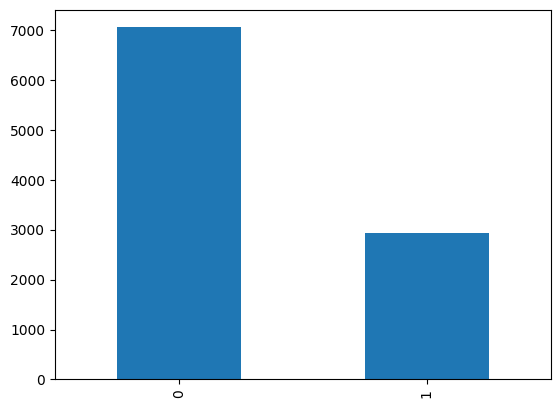

In [8]:
# @title Value counts of variable "student"
df[category].value_counts().plot(kind="bar")

In [9]:
# @title Two dataframes open by the bool variable "student":
df1 = df[df[category]==0]
df2 = df[df[category]==1]

In [10]:
# @title T Test
## Hacer el test t de student
t, p = ttest_ind(df1[col], df2[col])

#### Estamos haciendo un t test para determinar si podemos rechazar la hipótesis nula o "H0". La hipotesis nula es la que plantea la inexistencia de diferencias significativas entre el grupo "A" y el grupo "B" en un A/B testing. Para que esto suceda el p-value debe ser menor a 0.05 que no es otra cosa que el margen de error que estamos dispuestos a tolerar.  

In [12]:
# @title Read the result of T Test
## Imprimir los resultados
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("Rechazamos la hipótesis nula, hay diferencia significativa en las ventas entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula, no hay diferencia significativa en las ventas entre los dos grupos.")

t-value: -20.791129471653402
p-value: 4.992435688207333e-94
Rechazamos la hipótesis nula, hay diferencia significativa en las ventas entre los dos grupos.


#### Veamos entonces gráficamente ahora cual es el promedio de ventas (balance) de ambos grupos para entender por que motivo el p value nos obliga a rechazar la hipótesis nula.

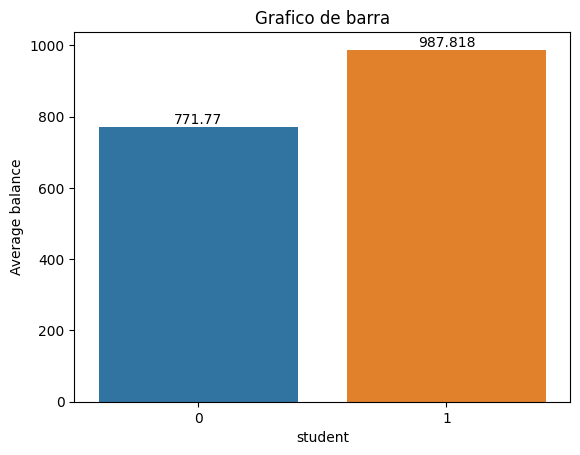

In [14]:
# @title Barplot mean of balance open by student

## Armo el gráfico de barras con apertura de segmento
ax = sns.barplot(data=df,
                 x=category,
                 y=col,
                 estimator='mean',
                 errorbar=None)

## Seteo las etiquetas de las barras, los ejes y el titulo de mi gráfico
ax.bar_label(ax.containers[0])
plt.xlabel(category)
plt.ylabel('Average '+col)
plt.title('Grafico de barra')

## Muestro el gráfico
plt.show()

## A/B Test o Test de dos muestras - Variables booleanas
Esta lección utiliza la función chi2_contingency de la librería scipy.stats para calcular el valor chi-cuadrado y el valor p para la tabla de contingencia de los datos en los dos dataframes df1 y df2. Luego, se imprime el valor p y se toma una decisión sobre la hipótesis nula de independencia entre las dos variables en función del valor p y el nivel de significancia establecido (en este caso, 0.05).    
El test chi-cuadrado se basa en la hipótesis nula de que las dos variables son independientes, es decir, que la probabilidad de observar un valor determinado en una variable no depende del valor observado en la otra variable. Si el valor p obtenido de la prueba es menor que el nivel de significancia establecido, se rechaza la hipótesis nula y se concluye que existe una asociación entre las dos variables.

In [31]:
# @title More libreries
## Statistics
import numpy as np
from scipy.stats import chi2_contingency

In [21]:
# @title Create DataFrame step

## DataFrame N°3
df3 = pd.DataFrame(np.random.choice(a=[0, 1], size=(100,)), columns=['arg'])
df3['base'] = 'df3'

## DataFrame N°4
df4 = pd.DataFrame(np.random.choice(a=[0, 1], size=(100,)), columns=['arg'])
df4['base'] = 'df4'

## Unifico bases para grafico
# df = pd.concat([df1, df2])

In [24]:
# @title Explore df3
df3.head(5)

,arg,base
0,1,df3
1,0,df3
2,0,df3
3,0,df3
4,0,df3


In [25]:
# @title Explore df4
df4.head(5)

,arg,base
0,1,df4
1,0,df4
2,0,df4
3,0,df4
4,0,df4


In [30]:
# @title Concat dataframes
## Unifico bases para grafico
df_concat = pd.concat([df3, df4])
df_concat.sample(10)

,arg,base
49,0,df3
28,1,df3
76,0,df4
94,1,df4
6,1,df3
41,1,df4
50,1,df4
32,0,df4
79,1,df3
85,0,df3


#### Como se puede observar concat de pandas unifica dos dataframes con los mismos nombres de columnas uno abajo del otro. Es uno de los tipos de uniones de dataframes que Pandas nos ofrece

In [32]:
# @title Set auxiliaries variables
## Seleccionar las columnas de interes para hacer la correlacion
col = "arg"
category= "base"

In [36]:
# @title Chi2 Test
## Genero test de chi-cuadrado
contingency_table = pd.crosstab(df3[col], df4[col])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [37]:
# @title Explora contingency_table
contingency_table # Pivot table entre ambos dataframes a traves de su columna "arg"

arg,0,1
arg,,
0,22,21
1,28,29


In [38]:
# @title Read the result of chi2 test
## Imprimir los resultados
print("p-value:", p)
if p < 0.05:
    print("Rechazamos la hipótesis nula, hay diferencia significativa entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula, no hay diferencia significativa entre los dos grupos.")

p-value: 1.0
No podemos rechazar la hipótesis nula, no hay diferencia significativa entre los dos grupos.


#### Veamos entonces gráficamente ahora cual es el promedio de "arg" de ambos dataframes para entender por que motivo el p value no nos permite rechazar la hipotesis nula o H0.

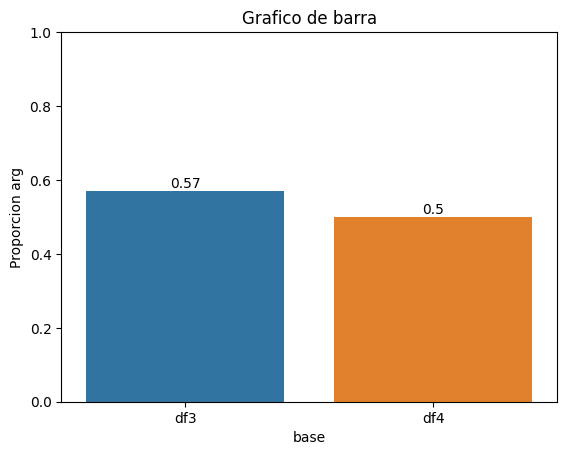

In [39]:
# @title Barplot mean of balance open by student

## Armo el gráfico de barras con apertura de segmento
ax = sns.barplot(data=df_concat,
                 x=category,
                 y=col,
                 estimator='mean',
                 errorbar=None)

## Seteo las etiquetas de las barras, los ejes y el titulo de mi gráfico
ax.bar_label(ax.containers[0])
plt.xlabel(category)
plt.ylabel('Proporcion '+col)
plt.title('Grafico de barra')
plt.ylim(0,1)

## Muestro el gráfico
plt.show()

## Challenges:

1. Realizar un T-test para la columna "income" del dataset guardado en "df".
2. Interpretar los resultados en función de si la diferencia es significativa o no.
3. ¿Rechazamos la hipotesis nula? ¿Por qué?
4. ¿Podemos afirmar la hipótesis nula? Justifique. (Habrá que investigar un poco por su propia cuenta sobre Test de hipótesis para este punto).
5. A los dataframes df3 y df4 sumales una nueva columna booleana llamada "tag_adult" que asuma los valores 0 y 1 (0 = True y 1 = False). Volve a unificarlos y realizá el test de chi2 sobre esta nueva columna booleana. Posteriormente interpreta los resultados del test.
6. Armá dos gráficos que fundamenten visualmente la conclusión a la que arribaste.